<h1 align=center><font size = 10> Classification - Neural Network </font></h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Thư viện cần thiết

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [3]:
# Nhập code của bạn ở đây:
df = pd.read_csv('/content/drive/MyDrive/MON 3 ASM2/pima-indians-diabetes.csv')
df.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [4]:
# Nhập code của bạn ở đây:
import seaborn as sns
matrix = df.corr()
matrix

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
PlGlcConc,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodP,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThick,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
TwoHourSerIns,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiPedFunc,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
HasDiabetes,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

<Axes: >

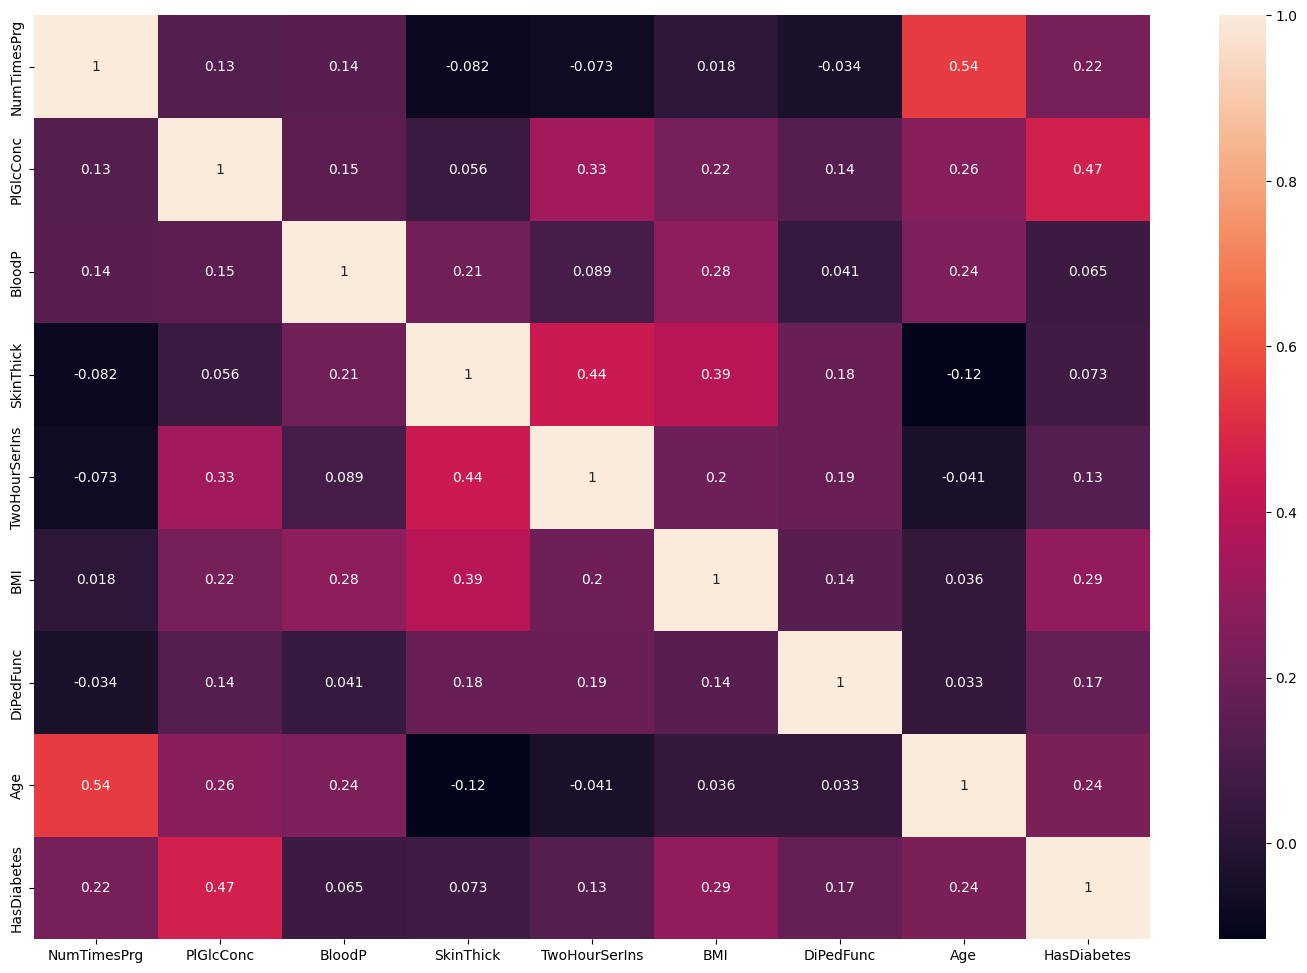

In [5]:
# Nhập code của bạn ở đây:
plt.figure(figsize=(18,12))
sns.heatmap(matrix, annot=True)

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

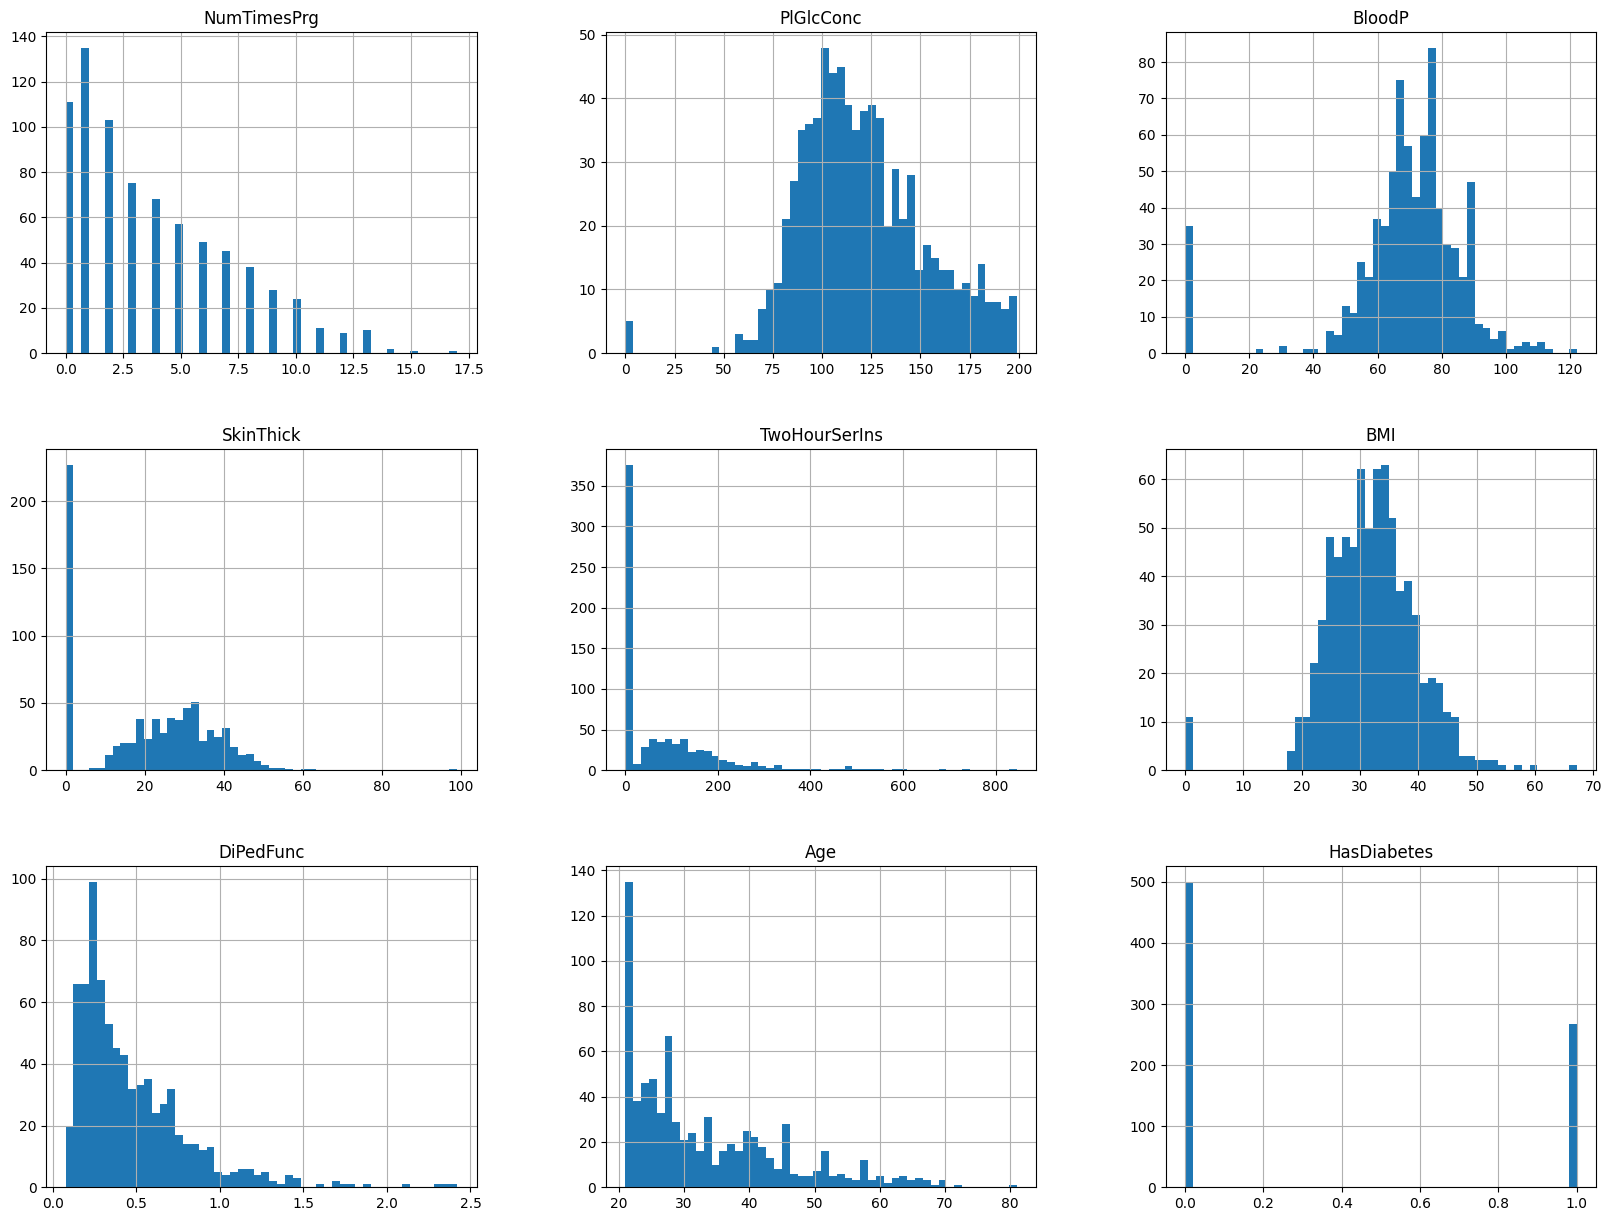

In [6]:
# Nhập code của bạn ở đây:
df.hist(bins=50, figsize=(20,15))
plt.show()

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [7]:
# Nhập code của bạn ở đây:
for i in ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']:
  median_i = np.median(df[df[i] != 0][i])
  df[i].replace(0, median_i, inplace=True)
df.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,72.387223,29.100391,140.692308,32.453716,0.471674,33.219035,0.348110
std,3.370877,30.443252,12.104527,8.794378,86.437570,6.879539,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [8]:
# Nhập code của bạn ở đây:
y = np.asarray(df['HasDiabetes'])
X = np.asarray(df.drop(labels='HasDiabetes', axis=1))
print('X_shape: ', X.shape)
print('y_shape: ', y.shape)

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

X_shape:  (767, 8)
y_shape:  (767,)


array([[-0.84372629, -1.20374133, -0.52801656, -0.01142283, -0.18166345,
        -0.85144308, -0.36426474, -0.18894038],
       [ 1.23423997,  2.01746344, -0.69335182, -0.01142283, -0.18166345,
        -1.33143942,  0.60470064, -0.1037951 ],
       [-0.84372629, -1.07226358, -0.52801656, -0.69412207, -0.54053782,
        -0.63326292, -0.91968415, -1.0403932 ],
       [-1.14057861,  0.50546936, -2.67737487,  0.67127642,  0.31613003,
         1.54853863,  5.48273197, -0.01864981],
       [ 0.343683  , -0.1847888 ,  0.13332445, -0.01142283, -0.18166345,
        -0.99689652, -0.8170523 , -0.27408566]])

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [9]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print('Train_set: ', X_train.shape, y_train.shape)
print('Test_set: ', X_test.shape, y_test.shape)

Train_set:  (613, 8) (613,)
Test_set:  (154, 8) (154,)


**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án:
- Nên thực hiện chuẩn hóa vì tập dữ liệu có các điểm dữ liệu (các cột) có đơn vị đo lường và độ lớn nhỏ khác nhau. Điều này tác động tới tính hiệu quả của nhiều thuật toán, ví dụ thời gian thực hiện, quá trình hội tụ... Vì vậy cần dùng preprocessing.StandardScaler để chuẩn hóa dữ liệu.
- Phân tách tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra để có thể đạt được độ chính xác cao khi dự đoán về dữ liệu chưa biết. Việc phân tách giúp cung cấp một đánh giá chính xác về độ chính xác ngoài mẫu vì tập dữ liệu kiểm tra không phải là một phần của tập dữ liệu huấn luyện đã được mô hình sử dụng để huấn luyện. Điều này có nghĩa là mô hình chưa được huấn luyện dữ liệu trong tập kiểm tra, từ đó giúp cho việc đánh giá khái quát hóa tốt.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [10]:
# Nhập code của bạn ở đây:
print('Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ: {}%'.format((round(len(df[df['HasDiabetes']==1])/len(df),4))*100))
print('Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập huấn luyện: {}%'.format(round(len(y_train[y_train==1])/len(y_train),4)*100 ))
print('Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập kiểm tra: {}%'.format(round(len(y_test[y_test==1])/len(y_test),4)*100) )

Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ: 34.81%
Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập huấn luyện: 35.4%
Tỷ lệ phụ nữ mắc bệnh tiểu đường trong tập kiểm tra: 32.47%


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [11]:
from sklearn.metrics import jaccard_score, f1_score

In [12]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
# Nhập code của bạn ở đây:
knn_model = KNeighborsClassifier()
k_range = list(range(1,21))
hyperparameters = dict(n_neighbors=k_range, 
                       p=(1,2), 
                       #algorithm=('auto', 'ball_tree', 'kd_tree', 'brute'),
                       weights=('uniform', 'distance'),
                       #leaf_size=(20,40,1),
                       #metric=('minkowski','euclidean','manhattan')
                       )

grid = GridSearchCV(knn_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy for training dataset with tuning is: 75.86%


In [15]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')
knn_model.fit(X_train, y_train)
knn_y_predict = knn_model.predict(X_test)
knn_f1_score = f1_score(y_test, knn_y_predict)
knn_jaccard_score = jaccard_score(y_test, knn_y_predict, pos_label=0)
print('f1 score: ', knn_f1_score)
print('jaccard score: ', knn_jaccard_score)

f1 score:  0.6382978723404256
jaccard score:  0.7258064516129032


In [16]:
f1_scores['train']['KNN'] = f1_score(y_train, knn_model.predict(X_train))
f1_scores['test']['KNN'] = knn_f1_score
jaccard_scores['train']['KNN'] = jaccard_score(y_train, knn_model.predict(X_train), pos_label=0)
jaccard_scores['test']['KNN'] = knn_jaccard_score

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

Trả lời:
- n_neighbors = 9: Tham số này cho biết số neighbors được sử dụng
- p = 1: Tham số công suất cho số liệu Minkowski. p=1 là chọn phương pháp khoảng cách manhattan_distance
- weights: kiểm tra xem việc thêm trọng số vào các điểm dữ liệu có lợi cho mô hình hay không. 'uniform' là không gán trọng số 

## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [17]:
from sklearn import tree

In [18]:
#Nhập code của bạn ở đây:
dtc_model = tree.DecisionTreeClassifier()
hyperparameters = dict(criterion=('gini', 'entropy', 'log_loss'), 
                       #splitter=('best', 'random'),
                       max_depth=np.arange(5,35,5), 
                       max_leaf_nodes=np.arange(2,21),
                       #min_samples_split=np.arange(2,21,2),
                       #min_samples_leaf=np.arange(1,11)
                       #max_features=('auto', 'sqrt', 'log2'),
                       #ccp_alpha=(0.1, .01, .001)
                       )
grid = GridSearchCV(dtc_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}
Accuracy for training dataset with tuning is: 74.40%


In [19]:
dtc_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=10)
dtc_model.fit(X_train, y_train)
dtc_y_predict = dtc_model.predict(X_test)
dtc_f1_score = f1_score(y_test, dtc_y_predict)
dtc_jaccard_score = jaccard_score(y_test, dtc_y_predict, pos_label=0)
print('f1 score: ', dtc_f1_score)
print('jaccard score: ', dtc_jaccard_score)

f1 score:  0.6464646464646464
jaccard score:  0.7131147540983607


In [20]:
f1_scores['train']['DT'] = f1_score(y_train, dtc_model.predict(X_train))
f1_scores['test']['DT'] = dtc_f1_score
jaccard_scores['train']['DT'] = jaccard_score(y_train, dtc_model.predict(X_train), pos_label=0)
jaccard_scores['test']['DT'] = dtc_jaccard_score

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

**Trả lời:**
Các tham số em đã chọn để tinh chỉnh trong thuật toán DT:
- criterion = 'gini': chỉ sổ để tính độ vấy bẩn (impurity) được chọn là 'gini'
- max_depth = 5: Tham số cho biết số lượng tối đa các câu hỏi khi đi từ node gốc tới node lá, độ sâu lớn nhất mà cây có thể phát triển được chọn là 5
- max_leaf_nodes = 10: Tham số cho biết số nút lá tối đa mà một cây quyết định có thể có là 10

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [21]:
from sklearn.svm import SVC

In [22]:
# Nhập code của bạn ở đây:
svm_model = SVC()
hyperparameters = dict(C=(0.1, 1, 10, 100),
                       gamma=(1, 0.1, 0.01, 0.001),
                       kernel= ('linear', 'poly', 'rbf', 'sigmoid')
                       )
grid = GridSearchCV(svm_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Accuracy for training dataset with tuning is: 77.15%


In [23]:
svm_model = SVC(C=1, gamma=0.01, kernel='sigmoid', probability=True)
svm_model.fit(X_train, y_train)
svm_y_predict = svm_model.predict(X_test)
svm_f1_score = f1_score(y_test, svm_y_predict)
svm_jaccard_score = jaccard_score(y_test, svm_y_predict, pos_label=0)
print('f1 score: ', svm_f1_score)
print('jaccard score: ', svm_jaccard_score)

f1 score:  0.6363636363636364
jaccard score:  0.746031746031746


In [24]:
f1_scores['train']['SVM'] = f1_score(y_train, svm_model.predict(X_train))
f1_scores['test']['SVM'] = svm_f1_score
jaccard_scores['train']['SVM'] = jaccard_score(y_train, svm_model.predict(X_train), pos_label=0)
jaccard_scores['test']['SVM'] = svm_jaccard_score

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

Đáp án:
- C = 1: (Regularization) Tham số này biểu thị mức độ phân loại sai của dữ liệu huấn luyện được cho phép trong mô hình
- gamma = 0.01: Tham số này quyết định mức độ ảnh hưởng của các điểm dữ liệu ở một khoảng cách nhất định so với siêu phẳng. Nếu gamma cao, thì sẽ xem xét các điểm lân cận. Nếu gamma thấp, các điểm ở xa cũng sẽ được xem xét.
- kernel = sigmoid: chỉ định loại kernel sẽ sử dụng trong thuật toán

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [25]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Nhập code của bạn ở đây:
lr_model = LogisticRegression()
hyperparameters = dict(penalty=('l1', 'l2', 'elasticnet', None),
                       solver=('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'),
                       C=(0.1, 1, 10, 100)
                       )
grid = GridSearchCV(lr_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ra

In [30]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [31]:
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

Accuracy for training dataset with tuning is: 76.50%


In [32]:
lr_model = LogisticRegression(C=1.0, penalty='l1', solver='saga')
lr_model.fit(X_train, y_train)
lr_y_predict = lr_model.predict(X_test)
lr_f1_score = f1_score(y_test, lr_y_predict)
lr_jaccard_score = jaccard_score(y_test, lr_y_predict, pos_label=0)
print('f1 score: ', lr_f1_score)
print('jaccard score: ', lr_jaccard_score)

f1 score:  0.6373626373626374
jaccard score:  0.736


In [33]:
f1_scores['train']['LR'] = f1_score(y_train, lr_model.predict(X_train))
f1_scores['test']['LR'] = lr_f1_score
jaccard_scores['train']['LR'] = jaccard_score(y_train, lr_model.predict(X_train), pos_label=0)
jaccard_scores['test']['LR'] = lr_jaccard_score

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

Trả lời:
- C = 1.0: Tham số này biểu thị mức độ phân loại sai của dữ liệu huấn luyện được cho phép trong mô hình
- penalty = l1: Tham số này chỉ định định mức của hình phạt. penalty = l1: là thêm điều khoản L1
- solver = saga: Tham số này là thuật toán sử dụng trong bài toán tối ưu

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
# Nhập code của bạn ở đây:
nn_model = MLPClassifier()
hyperparameters = dict(hidden_layer_sizes=((10,30,10), (10,50,10), (100,)),
                       activation=('tanh', 'relu'),
                       max_iter=(200,1000,2000),
                       #solver=('sgd', 'adam'),
                       #alpha=(0.0001, 0.05),
                       #learning_rate=('constant','adaptive'),
                       )
grid = GridSearchCV(nn_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 200}
Accuracy for training dataset with tuning is: 75.85%


In [36]:
nn_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), max_iter=200)
nn_model.fit(X_train, y_train)
nn_y_predict = nn_model.predict(X_test)
nn_f1_score = f1_score(y_test, nn_y_predict)
nn_jaccard_score = jaccard_score(y_test, nn_y_predict, pos_label=0)
print('f1 score: ', nn_f1_score)
print('jaccard score: ', nn_jaccard_score)

f1 score:  0.6736842105263158
jaccard score:  0.7459016393442623


In [37]:
f1_scores['train']['NN'] = f1_score(y_train, nn_model.predict(X_train))
f1_scores['test']['NN'] = nn_f1_score
jaccard_scores['train']['NN'] = jaccard_score(y_train, nn_model.predict(X_train), pos_label=0)
jaccard_scores['test']['NN'] = nn_jaccard_score

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

Trả lời:
- activation = 'tanh': Tham số này chỉ chức năng kích hoạt cho các lớp ẩn
- hidden_layer_sizes = (100,): Tham số này chỉ định số lượng lớp và số lượng nút trong NN Classifier. Mỗi phần tử trong tuple đại diện cho số nút ở vị trí thứ i, trong đó i là index của tuple. Do đó, độ dài của tuple cho biết tổng số lớp ẩn trong NN
- max_iter = 200: số lần lặp tối đa

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [38]:
from sklearn.ensemble import VotingClassifier

In [42]:
sve_model = VotingClassifier(estimators=[('knn',knn_model), ('dtc',dtc_model), ('svm',svm_model), ('lr',lr_model), ('nn',nn_model)], 
                             voting='soft')
hyperparameters = dict(weights=([1,1,1,1,1],[1,2,3,4,5],[5,4,3,2,1],[1,2,3,2,1]))

grid = GridSearchCV(sve_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'weights': [5, 4, 3, 2, 1]}
Accuracy for training dataset with tuning is: 77.16%


In [43]:
# Nhập code của bạn ở đây:
sve_model = VotingClassifier(estimators=[('knn',knn_model), ('dtc',dtc_model), ('svm',svm_model), ('lr',lr_model), ('nn',nn_model)], 
                             voting='soft',
                             weights=[5,4,3,2,1]
                             )

sve_model.fit(X_train, y_train)
sve_y_predict = sve_model.predict(X_test)
sve_f1_score = f1_score(y_test, sve_y_predict)
sve_jaccard_score = jaccard_score(y_test, sve_y_predict, pos_label=0)
print('f1 score: ', sve_f1_score)
print('jaccard score: ', sve_jaccard_score)

f1 score:  0.6666666666666666
jaccard score:  0.7479674796747967


In [44]:
f1_scores['train']['EN_SOFT'] = f1_score(y_train, sve_model.predict(X_train))
f1_scores['test']['EN_SOFT'] = sve_f1_score
jaccard_scores['train']['EN_SOFT'] = jaccard_score(y_train, sve_model.predict(X_train), pos_label=0)
jaccard_scores['test']['EN_SOFT'] = sve_jaccard_score

## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [45]:
hve_model = VotingClassifier(estimators=[('knn',knn_model), ('dtc',dtc_model), ('svm',svm_model), ('lr',lr_model), ('nn',nn_model)], 
                             voting='hard')
hyperparameters = dict(weights=([1,1,1,1,1],[1,2,3,4,5],[5,4,3,2,1],[1,2,3,2,1],[3,2,2,1,1]))

grid = GridSearchCV(hve_model, hyperparameters, cv=10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print('Accuracy for training dataset with tuning is: {:.2f}%'.format(grid_search.best_score_*100))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'weights': [5, 4, 3, 2, 1]}
Accuracy for training dataset with tuning is: 77.81%


In [46]:
# Nhập code của bạn ở đây:
hve_model = VotingClassifier(estimators=[('knn',knn_model), ('dtc',dtc_model), ('svm',svm_model), ('lr',lr_model), ('nn',nn_model)], 
                             voting='hard',
                             weights=[5,4,3,2,1]
                             )

hve_model.fit(X_train, y_train)
hve_y_predict = hve_model.predict(X_test)
hve_f1_score = f1_score(y_test, hve_y_predict)
hve_jaccard_score = jaccard_score(y_test, hve_y_predict, pos_label=0)
print('f1 score: ', hve_f1_score)
print('jaccard score: ', hve_jaccard_score)

f1 score:  0.7157894736842104
jaccard score:  0.775


In [47]:
f1_scores['train']['EN_HARD'] = f1_score(y_train, hve_model.predict(X_train))
f1_scores['test']['EN_HARD'] = hve_f1_score
jaccard_scores['train']['EN_HARD'] = jaccard_score(y_train, hve_model.predict(X_train), pos_label=0)
jaccard_scores['test']['EN_HARD'] = hve_jaccard_score

# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [48]:
# Nhập code của bạn ở đây:
df1 = pd.DataFrame(f1_scores)
df1.columns=['F1-score-training', 'F1-score-testing']
df2 = pd.DataFrame(jaccard_scores)
df2.columns=['Jaccard-training', 'Jaccard-testing']
df = pd.concat([df1, df2], axis=1)
df.iloc[:, [2, 0, 3, 1]]

,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
KNN,0.749474,0.698734,0.725806,0.638298
DT,0.733475,0.697337,0.713115,0.646465
SVM,0.719124,0.611570,0.746032,0.636364
LR,0.716327,0.638961,0.736000,0.637363
NN,0.711019,0.655087,0.745902,0.673684
EN_HARD,0.757322,0.699482,0.775000,0.715789
EN_SOFT,0.750000,0.689119,0.747967,0.666667


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời:
Không phải lúc nào phương pháp ensemble cũng luôn tốt hơn một mô hình đơn lẻ vì trong trường hợp ta kết hợp 1 mô hình tốt với các mô hình xấu, kết quả sau khi lấy trung bình theo trọng số có thể sẽ cho ra mô hình xấu hơn. Tính trung bình của mô hình chỉ hoạt động tốt khi các mô hình riêng lẻ có phương sai cao, ensemble có thể tạo ra phương sai thấp hơn và độ lệch thấp hơn.